# This notebook is code for accompanying article Model Benefit Evaluation with Lift and Gain Analysis

Article: https://towardsdatascience.com/model-benefit-evaluation-with-lift-and-gain-analysis-4b69f9288ab3?sk=3bed0d5a4210043e65a75690184e609a

Dataset: https://www.kaggle.com/blastchar/telco-customer-churn

In [1]:
churn = pd.read_csv('churn.csv')

In [2]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
churn = churn.drop('customerID', axis = 1)

In [5]:
for i in ['Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 
          'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']:
    churn[i] = churn[i].apply(lambda x: 1 if x == 'Yes' else 0)

In [6]:
churn = pd.get_dummies(churn, columns = ['gender', 'MultipleLines', 'InternetService', 'Contract', 'PaymentMethod'], drop_first = True)

In [7]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   Partner                                7043 non-null   int64  
 2   Dependents                             7043 non-null   int64  
 3   tenure                                 7043 non-null   int64  
 4   PhoneService                           7043 non-null   int64  
 5   OnlineSecurity                         7043 non-null   int64  
 6   OnlineBackup                           7043 non-null   int64  
 7   DeviceProtection                       7043 non-null   int64  
 8   TechSupport                            7043 non-null   int64  
 9   StreamingTV                            7043 non-null   int64  
 10  StreamingMovies                        7043 non-null   int64  
 11  Pape

In [8]:
churn['TotalCharges'] = churn['TotalCharges'].apply(lambda x: 0 if x == ' ' else float(x))

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [10]:
X_train, X_test, y_train, y_test = train_test_split(churn.drop('Churn', axis =1), churn['Churn'], test_size = 0.3, 
                                                    stratify = churn['Churn'], random_state = 101)

In [11]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [12]:
model.predict_proba(X_test)[:,1]

array([0.34328675, 0.17757685, 0.0025605 , ..., 0.57879907, 0.0659893 ,
       0.51827743])

In [13]:
model.predict(X_test)

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [14]:
model.predict_proba(X_test)

array([[0.65671325, 0.34328675],
       [0.82242315, 0.17757685],
       [0.9974395 , 0.0025605 ],
       ...,
       [0.42120093, 0.57879907],
       [0.9340107 , 0.0659893 ],
       [0.48172257, 0.51827743]])

In [15]:
X_test

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2126,0,0,0,1,1,0,0,0,0,0,0,0,44.45,44.45,1,0,0,0,0,0,0,0,0,1
2019,0,1,0,67,1,0,1,1,0,1,1,0,104.10,7040.85,1,0,1,1,0,1,0,0,1,0
6309,0,1,0,71,1,0,0,0,0,0,0,0,25.60,1888.25,0,0,1,0,1,0,1,1,0,0
45,0,0,0,49,1,0,0,0,0,0,1,1,84.50,3906.70,0,0,1,1,0,0,0,0,1,0
6770,0,1,1,4,1,0,0,0,0,1,0,1,78.90,299.75,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4611,0,1,0,72,1,0,0,0,0,0,0,1,24.15,1776.45,0,0,1,0,1,0,1,1,0,0
5978,0,0,0,46,1,1,1,0,0,0,0,0,84.25,3847.60,0,0,1,1,0,0,0,0,0,1
6914,1,1,0,43,1,0,1,1,0,1,1,1,103.00,4414.30,1,0,1,1,0,0,0,0,1,0
480,0,1,1,11,1,0,0,0,0,0,0,0,19.65,225.75,1,0,0,0,1,0,1,0,0,1


In [16]:
model.predict_proba(X_test)

array([[0.65671325, 0.34328675],
       [0.82242315, 0.17757685],
       [0.9974395 , 0.0025605 ],
       ...,
       [0.42120093, 0.57879907],
       [0.9340107 , 0.0659893 ],
       [0.48172257, 0.51827743]])

In [17]:
from sklearn.metrics import classification_report

In [18]:
predictions = model.predict(X_test)

In [19]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1552
           1       0.64      0.53      0.58       561

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



In [20]:
X_test['Churn'] = y_test

In [21]:
X_test['Prob']  = model.predict_proba(X_test.drop('Churn', axis =1))[:,1]

In [22]:
X_test = X_test.sort_values(by = 'Prob', ascending = False)

In [23]:
X_test

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn,Prob
5989,1,1,0,3,1,0,0,0,0,1,1,1,94.60,279.55,1,0,1,1,0,0,0,0,1,0,1,0.873756
1976,1,0,0,1,1,0,0,0,0,1,1,1,93.55,93.55,1,0,1,1,0,0,0,0,1,0,1,0.871818
2208,1,1,0,1,1,0,0,1,0,1,1,1,100.80,100.80,0,0,1,1,0,0,0,0,1,0,1,0.867070
1410,1,0,0,2,1,0,0,0,0,1,1,1,93.85,170.85,0,0,1,1,0,0,0,0,1,0,1,0.861796
301,1,0,0,4,1,0,0,0,0,1,1,1,95.45,396.10,0,0,1,1,0,0,0,0,1,0,1,0.857102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6528,0,1,1,70,1,0,0,0,0,0,0,0,20.35,1458.10,1,0,0,0,1,0,1,1,0,0,0,0.001537
6614,0,1,1,71,1,0,0,0,0,0,0,0,19.70,1301.10,1,0,0,0,1,0,1,1,0,0,0,0.001333
4732,0,1,1,71,1,0,0,0,0,0,0,0,19.90,1397.30,0,0,0,0,1,0,1,1,0,0,0,0.001323
109,0,1,1,72,1,0,0,0,0,0,0,0,19.40,1363.25,1,0,0,0,1,0,1,1,0,0,0,0.001266


In [24]:
X_test['Decile'] = pd.qcut(X_test['Prob'], 10, labels=[i for i in range (10, 0, -1)])

In [25]:
X_test

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn,Prob,Decile
5989,1,1,0,3,1,0,0,0,0,1,1,1,94.60,279.55,1,0,1,1,0,0,0,0,1,0,1,0.873756,1
1976,1,0,0,1,1,0,0,0,0,1,1,1,93.55,93.55,1,0,1,1,0,0,0,0,1,0,1,0.871818,1
2208,1,1,0,1,1,0,0,1,0,1,1,1,100.80,100.80,0,0,1,1,0,0,0,0,1,0,1,0.867070,1
1410,1,0,0,2,1,0,0,0,0,1,1,1,93.85,170.85,0,0,1,1,0,0,0,0,1,0,1,0.861796,1
301,1,0,0,4,1,0,0,0,0,1,1,1,95.45,396.10,0,0,1,1,0,0,0,0,1,0,1,0.857102,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6528,0,1,1,70,1,0,0,0,0,0,0,0,20.35,1458.10,1,0,0,0,1,0,1,1,0,0,0,0.001537,10
6614,0,1,1,71,1,0,0,0,0,0,0,0,19.70,1301.10,1,0,0,0,1,0,1,1,0,0,0,0.001333,10
4732,0,1,1,71,1,0,0,0,0,0,0,0,19.90,1397.30,0,0,0,0,1,0,1,1,0,0,0,0.001323,10
109,0,1,1,72,1,0,0,0,0,0,0,0,19.40,1363.25,1,0,0,0,1,0,1,1,0,0,0,0.001266,10


In [26]:
res = pd.crosstab(X_test['Decile'], X_test['Churn'])[1].reset_index().rename(columns = {1: 'Number of Responses'})

In [27]:
lg = X_test['Decile'].value_counts(sort = False).reset_index().rename(columns = {'Decile': 'Number of Cases', 'index': 'Decile'})

In [28]:
lg = pd.merge(lg, res, on = 'Decile').sort_values(by = 'Decile', ascending = False).reset_index(drop = True)

In [29]:
lg

,Decile,Number of Cases,Number of Responses
0,1,212,154
1,2,211,129
2,3,211,89
3,4,211,64
4,5,211,41
5,6,212,30
6,7,211,26
7,8,211,16
8,9,211,5
9,10,212,7


In [30]:
lg['Cumulative Responses'] = lg['Number of Responses'].cumsum()

In [31]:
lg

,Decile,Number of Cases,Number of Responses,Cumulative Responses
0,1,212,154,154
1,2,211,129,283
2,3,211,89,372
3,4,211,64,436
4,5,211,41,477
5,6,212,30,507
6,7,211,26,533
7,8,211,16,549
8,9,211,5,554
9,10,212,7,561


In [32]:
lg['% of Events'] = np.round(((lg['Number of Responses']/lg['Number of Responses'].sum())*100),2)

In [33]:
lg

,Decile,Number of Cases,Number of Responses,Cumulative Responses,% of Events
0,1,212,154,154,27.45
1,2,211,129,283,22.99
2,3,211,89,372,15.86
3,4,211,64,436,11.41
4,5,211,41,477,7.31
5,6,212,30,507,5.35
6,7,211,26,533,4.63
7,8,211,16,549,2.85
8,9,211,5,554,0.89
9,10,212,7,561,1.25


In [34]:
lg['Gain'] = lg['% of Events'].cumsum()

In [35]:
lg['Decile'] = lg['Decile'].astype('int')

In [36]:
lg['Decile'] = lg['Decile'].astype('int')
lg['lift'] = np.round((lg['Gain']/(lg['Decile']*10)),2)

In [37]:
lg

,Decile,Number of Cases,Number of Responses,Cumulative Responses,% of Events,Gain,lift
0,1,212,154,154,27.45,27.45,2.74
1,2,211,129,283,22.99,50.44,2.52
2,3,211,89,372,15.86,66.30,2.21
3,4,211,64,436,11.41,77.71,1.94
4,5,211,41,477,7.31,85.02,1.70
5,6,212,30,507,5.35,90.37,1.51
6,7,211,26,533,4.63,95.00,1.36
7,8,211,16,549,2.85,97.85,1.22
8,9,211,5,554,0.89,98.74,1.10
9,10,212,7,561,1.25,99.99,1.00


<BarContainer object of 10 artists>

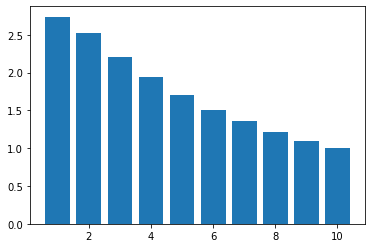

In [38]:
plt.bar(lg['Decile'], lg['lift'])

In [39]:
gains = [0]
for i in lg['Gain'].values:
    gains.append(i)

Text(0.5, 0, 'Decile')

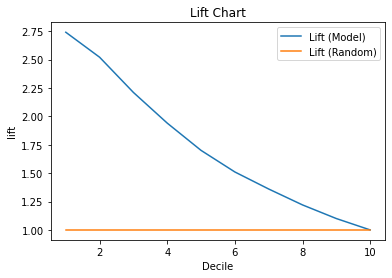

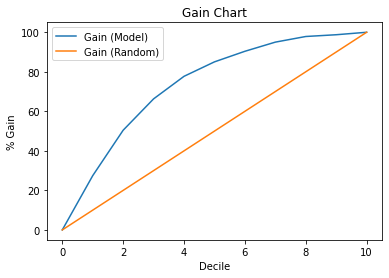

In [40]:
plt.subplots(1,1)
sns.lineplot(data = lg, x = 'Decile', y = 'lift', markers = 'o', label  = 'Lift (Model)')
sns.lineplot(x = lg['Decile'], y = [1 for i in range(10)], markers = 'o', label  = 'Lift (Random)')
plt.title('Lift Chart')

plt.subplots(1,1)
sns.lineplot( x = [i for i in range(0,11)], y = gains, markers = 'o', label  = 'Gain (Model)')
sns.lineplot( x = [i for i in range(0,11)], y = [i for i in range(0, 110, 10) ], markers = 'o', label  = 'Gain (Random)')
plt.title('Gain Chart')
plt.ylabel('% Gain')
plt.xlabel('Decile')